# Is Global Warming a Thing?

#### This is an attempt  to find comparisons between the assumption that global warming is real or not.
#### To decide, you'll conduct a study on a 200-year trend from 1813-2013. These samples should be sufficient enough to determine the validity of Global Warming.

<strong>Note</strong>: to complete this data report, you will need to calculate moving average of weather over a period of 200 years. Click <a href="https://www.portent.com/blog/analytics/rolling-averages-math-moron.htm">here</a> to learn how to calculate moving averages.

<strong>Moving averages are also known as rolling averages</strong>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Retrieving Data

In [2]:
df_global = pd.read_csv('weather_global.csv')
df_chicago = pd.read_csv('weather_chicago.csv')

In [3]:
df_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [4]:
df_chicago.head()

,year,city,country,avg_temp
0,1743,Chicago,United States,5.44
1,1744,Chicago,United States,11.73
2,1745,Chicago,United States,1.80
3,1746,Chicago,United States,NaN
4,1747,Chicago,United States,NaN


## Clean Data

#### Drop 'city' and 'country' columns

In [5]:
df_chicago.drop(['city', 'country'], axis=1, inplace=True)

In [6]:
df_chicago.columns

Index(['year', 'avg_temp'], dtype='object')

#### Check for null values

In [7]:
df_chicago.isnull().sum()

year        0
avg_temp    4
dtype: int64

In [8]:
df_global.isna().sum()

year        0
avg_temp    0
dtype: int64

#### Remove null values

In [9]:
df_chicago.dropna(inplace=True)

In [10]:
df_chicago.isnull().sum()

year        0
avg_temp    0
dtype: int64

#### Convert all temps to Fahrenheit

In [11]:
# df_chicago.avg_temp = df_chicago.avg_temp.apply(lambda temp: round(temp * (9/5) + 32), 4)
# df_global.avg_temp = df_global.avg_temp.apply(lambda temp: round(temp * (9/5) + 32), 4)

In [12]:
df_chicago

,year,avg_temp
0,1743,5.44
1,1744,11.73
2,1745,1.80
7,1750,10.49
8,1751,11.19
...,...,...
266,2009,10.30
267,2010,11.82
268,2011,11.21
269,2012,12.82


#### Trim results to same time period

In [13]:
df_chicago = df_chicago.query('year >= 1764 and year <= 2013')
df_global = df_global.query('year >= 1764 and year <= 2013')

#### Save to new CSVs

In [14]:
df_chicago.to_csv('clean_chicago.csv')

In [15]:
df_global.to_csv('clean_global.csv')

In [16]:
df_chicago.reset_index(drop=True, inplace=True)
df_global.reset_index(drop=True, inplace=True)

In [17]:
df_global

,year,avg_temp
0,1764,8.40
1,1765,8.25
2,1766,8.41
3,1767,8.22
4,1768,6.78
...,...,...
245,2009,9.51
246,2010,9.70
247,2011,9.52
248,2012,9.51


## Global 50-year moving average

#### Calculated 50-year moving average starting from 1764. First calculated average starts at 1813

In [18]:
# DON'T RUN THIS CELL
# THESE ARE THE NUMBERS YOU SHOULD BE GETTING

#### Create a new column that holds rolling averages

In [19]:
df_chicago.avg_temp.rolling(50).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
245    10.6102
246    10.6444
247    10.6570
248    10.7136
249    10.7476
Name: avg_temp, Length: 250, dtype: float64

In [20]:
df_chicago['ra50'] = round(df_chicago.avg_temp.rolling(50).mean(), 2)
df_global['ra50'] = round(df_global.avg_temp.rolling(50).mean(), 2)

<ipython-input-20-54192c502e56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chicago['ra50'] = round(df_chicago.avg_temp.rolling(50).mean(), 2)


In [21]:
df_chicago[df_chicago.ra50.notnull()]

,year,avg_temp,ra50
49,1813,9.67,9.95
50,1814,9.55,9.93
51,1815,8.86,9.91
52,1816,8.27,9.87
53,1817,8.54,9.85
...,...,...,...
245,2009,10.30,10.61
246,2010,11.82,10.64
247,2011,11.21,10.66
248,2012,12.82,10.71


In [23]:
year_range = range(1813, 2014, 50)
year_labels = ['1813', '1863', '1913', '1963', '2013']


#### global

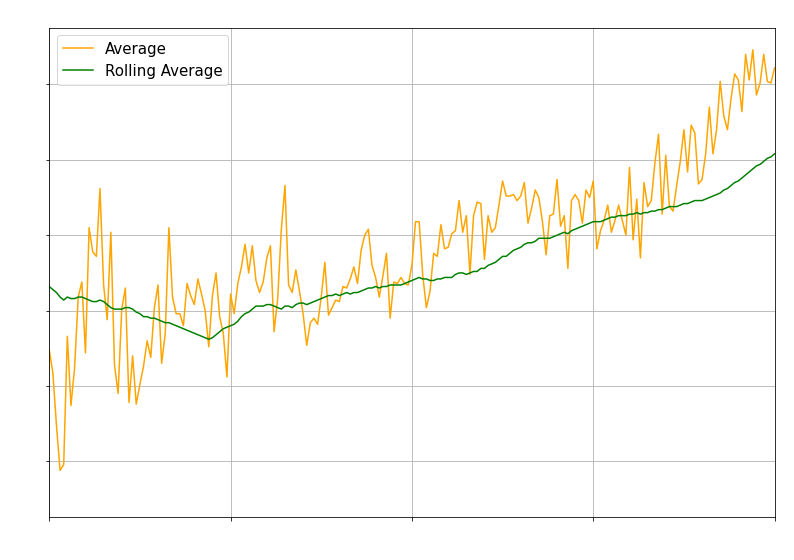

In [27]:
plt.figure(figsize=(13, 9))
plt.plot(df_global.year, df_global.avg_temp, color='orange')
plt.plot(df_global.year, df_global.ra50, color='green')
plt.xticks(year_range, year_labels, color='white')
plt.yticks(color='white')
plt.xlim(int(year_labels[0]), int(year_labels[-1]))
plt.title('Global Temperatures (1813-2013)', fontsize=(20), color='white')
plt.ylabel('Temperature Fahrenheit', fontsize=(15), color='white')
plt.xlabel('Year', fontsize=(15), color='white')
plt.grid(True)
plt.legend(['Average', 'Rolling Average'], prop={'size': 15});

## Chicago 50-year moving average

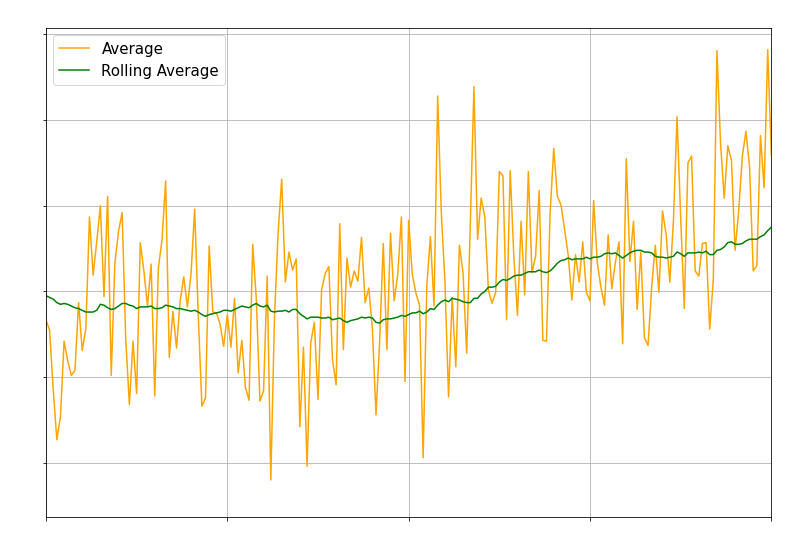

In [29]:
plt.figure(figsize=(13, 9))
plt.plot(df_chicago.year, df_chicago.avg_temp, color='orange')
plt.plot(df_chicago.year, df_chicago.ra50, color='green')
plt.xticks(year_range, year_labels, color='white')
plt.yticks(color='white')
plt.xlim(int(year_labels[0]), int(year_labels[-1]))
plt.title('Chicago Temperatures (1813-2013)', fontsize=(20), color='white')
plt.ylabel('Temperature Fahrenheit', fontsize=(15), color='white')
plt.xlabel('Year', fontsize=(15), color='white')
plt.grid(True)
plt.legend(['Average', 'Rolling Average'], prop={'size': 15});

## Conclusions
#### 1) CLIMATE CHANGE IS REAL
#### 2) CLIMATE CHANGE IS REAL
#### 3) CLIMATE CHANGE IS REAL
#### 4) CLIMATE CHANGE IS REAL